In [17]:
import pandas as pd
# 기존 데이터를 로드합니다.
df_old = pd.read_csv("/content/drive/MyDrive/간이프로젝트/12월4일/지역특징.xlsx - 시트8 (3).csv")

In [3]:
# df_old.rename(columns={'Unnamed: 0': '지역'}, inplace=True)

In [18]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   지점명              192 non-null    object 
 1   월                192 non-null    object 
 2   해면기압 평균(hPa)     192 non-null    float64
 3   해면기압 표준편차(hPa)   192 non-null    float64
 4   평균기온 평균(℃)       192 non-null    float64
 5   평균기온 표준편차(℃)     192 non-null    float64
 6   최고기온 평균(℃)       192 non-null    float64
 7   최저기온 평균(℃)       192 non-null    float64
 8   강수량 합계(㎜)        192 non-null    float64
 9   강수량 표준편차(㎜)      192 non-null    float64
 10  강수량 계속시간(시간)     132 non-null    float64
 11  상대습도 평균(%)       192 non-null    float64
 12  증기압 평균(hPa)      192 non-null    float64
 13  증기압 표준편차(hPa)    192 non-null    float64
 14  일조시간 합계(시간)      192 non-null    float64
 15  수평면일사량 합계(MJ/㎡)  144 non-null    float64
 16  가로수 선정(종)        192 non-null    object 
dtypes: float64(14), 

In [19]:
df_old.isnull().sum()

지점명                 0
월                   0
해면기압 평균(hPa)        0
해면기압 표준편차(hPa)      0
평균기온 평균(℃)          0
평균기온 표준편차(℃)        0
최고기온 평균(℃)          0
최저기온 평균(℃)          0
강수량 합계(㎜)           0
강수량 표준편차(㎜)         0
강수량 계속시간(시간)       60
상대습도 평균(%)          0
증기압 평균(hPa)         0
증기압 표준편차(hPa)       0
일조시간 합계(시간)         0
수평면일사량 합계(MJ/㎡)    48
가로수 선정(종)           0
dtype: int64

In [20]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# df_old 데이터프레임 정의 (이 부분은 실제 데이터에 맞게 수정해야 합니다)
# 예: df_old = pd.read_csv('data.csv')

# 지점명 열의 값을 고유한 번호로 매핑합니다.
mapping_locations = {
    "강원특별자치도": 1,
    "서울특별시": 2,
    "인천광역시": 3,
    "경기도": 4,
    "충청북도": 5,
    "충청남도": 6,
    "대전광역시": 7,
    "전라북도": 8,
    "울산광역시": 9,
    "경상남도": 10,
    "광주광역시": 11,
    "부산광역시": 12,
    "전라남도": 13,
    "제주특별자치도": 14,
    "경상북도": 15,
    "대구광역시": 16
}
df_old["지점명"] = df_old["지점명"].replace(mapping_locations)

mapping_species = {
    "은행나무": 1,
    "왕벚나무": 2,
    "이팝나무": 3,
    "느티나무": 4,
    "무궁화": 5
}

df_old["가로수 선정(종)"] = df_old["가로수 선정(종)"].replace(mapping_species)

# 월 열의 값을 고유한 번호로 매핑합니다.
mapping_months = {
    "1월": 1,
    "2월": 2,
    "3월": 3,
    "4월": 4,
    "5월": 5,
    "6월": 6,
    "7월": 7,
    "8월": 8,
    "9월": 9,
    "10월": 10,
    "11월": 11,
    "12월": 12
}
df_old["월"] = df_old["월"].replace(mapping_months)

from sklearn.impute import KNNImputer

# KNNImputer 인스턴스 생성
imputer = KNNImputer(n_neighbors=3)

# 결측치를 포함한 데이터프레임에 imputer 적용
df_filled = imputer.fit_transform(df_old)

# 변환된 데이터를 데이터프레임으로 변환
df_filled = pd.DataFrame(df_filled, columns=df_old.columns)


In [21]:
region_data = df_filled

In [22]:
region_data.isnull().sum()

지점명                0
월                  0
해면기압 평균(hPa)       0
해면기압 표준편차(hPa)     0
평균기온 평균(℃)         0
평균기온 표준편차(℃)       0
최고기온 평균(℃)         0
최저기온 평균(℃)         0
강수량 합계(㎜)          0
강수량 표준편차(㎜)        0
강수량 계속시간(시간)       0
상대습도 평균(%)         0
증기압 평균(hPa)        0
증기압 표준편차(hPa)      0
일조시간 합계(시간)        0
수평면일사량 합계(MJ/㎡)    0
가로수 선정(종)          0
dtype: int64

In [23]:
region_data

,지점명,월,해면기압 평균(hPa),해면기압 표준편차(hPa),평균기온 평균(℃),평균기온 표준편차(℃),최고기온 평균(℃),최저기온 평균(℃),강수량 합계(㎜),강수량 표준편차(㎜),강수량 계속시간(시간),상대습도 평균(%),증기압 평균(hPa),증기압 표준편차(hPa),일조시간 합계(시간),수평면일사량 합계(MJ/㎡),가로수 선정(종)
0,1.0,1.0,1022.7,0.9,1.0,2.1,5.4,2.6,37.5,29.9,36.633333,42.5,3.2,0.7,207.5,276.0,3.0
1,1.0,2.0,1022.1,1.5,2.4,1.5,6.9,1.5,56.2,57.8,42.333333,48.7,3.8,0.7,192.2,324.4,3.0
2,1.0,3.0,1018.2,1.8,7.7,1.3,12.4,3.1,58.1,33.3,58.133333,49.2,5.0,0.7,222.2,459.3,3.0
3,1.0,4.0,1014.0,1.9,13.0,1.5,17.9,8.2,99.9,47.7,68.500000,51.3,7.2,0.5,220.5,543.2,3.0
4,1.0,5.0,1010.3,1.1,18.8,1.6,23.7,14.2,55.4,51.2,61.866667,55.1,11.1,1.1,242.3,643.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,16.0,8.0,1009.1,1.0,27.5,1.4,32.3,23.7,249.1,105.9,65.900000,73.3,25.4,1.0,165.1,473.9,4.0
188,16.0,9.0,1014.3,1.1,22.2,0.6,27.1,18.2,147.4,87.5,57.500000,66.7,17.8,0.4,190.8,456.4,4.0
189,16.0,10.0,1020.1,0.8,16.4,0.8,21.9,11.7,88.8,53.2,24.800000,61.0,11.1,1.4,229.1,416.2,4.0
190,16.0,11.0,1021.5,1.6,9.9,1.2,15.0,5.5,32.8,25.2,21.100000,57.1,7.3,1.7,190.0,299.2,4.0


In [24]:
# 수치를 원래의 지역명으로 매핑하기 위한 딕셔너리 생성
reverse_mapping_locations = {v: k for k, v in mapping_locations.items()}

# 매핑 적용
region_data["지점명"] = region_data["지점명"].replace(reverse_mapping_locations)


In [25]:
region_data = region_data.rename(columns={'지점명': '지역'})

In [33]:
region_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   지역               192 non-null    object 
 1   월                192 non-null    float64
 2   해면기압 평균(hPa)     192 non-null    float64
 3   해면기압 표준편차(hPa)   192 non-null    float64
 4   평균기온 평균(℃)       192 non-null    float64
 5   평균기온 표준편차(℃)     192 non-null    float64
 6   최고기온 평균(℃)       192 non-null    float64
 7   최저기온 평균(℃)       192 non-null    float64
 8   강수량 합계(㎜)        192 non-null    float64
 9   강수량 표준편차(㎜)      192 non-null    float64
 10  강수량 계속시간(시간)     192 non-null    float64
 11  상대습도 평균(%)       192 non-null    float64
 12  증기압 평균(hPa)      192 non-null    float64
 13  증기압 표준편차(hPa)    192 non-null    float64
 14  일조시간 합계(시간)      192 non-null    float64
 15  수평면일사량 합계(MJ/㎡)  192 non-null    float64
 16  가로수 선정(종)        192 non-null    float64
dtypes: float64(16), 

In [27]:
df_new1 = pd.read_csv("/content/drive/MyDrive/간이프로젝트/12월3일/나무수량_데이터정제.csv")

In [28]:
df_new1.head()

,Unnamed: 0,지역,벚나무,왕벚나무,은행나무,느티나무,메타세쿼이어,양버즘나무,단풍나무,중국단풍,백합나무,배롱나무,이팝나무,곰솔,무궁화
0,2,서울특별시,-,"32,641","109,784","35,880","5,316","64,007","1,522","1,049",956,"2,743","16,460",-,"2,295"
1,3,부산광역시,288,"50,364","34,843","22,603","3,375","7,934",359,"2,232","1,002",-,"13,724","4,020",-
2,4,대구광역시,346,"27,084","52,015","46,649","2,531","30,029","6,176","8,854","2,460","5,973","23,759",-,518
3,5,인천광역시,"5,231","30,288","45,577","39,212","14,570","16,338",930,"10,277","6,640",41,"24,215","5,340",700
4,6,광주광역시,"1,095","2,394","43,396","23,852","10,591","4,963",-,"4,974","1,228","4,478","17,231",421,191


In [16]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17 non-null     int64 
 1   지역          17 non-null     object
 2   벚나무         17 non-null     object
 3   왕벚나무        17 non-null     object
 4   은행나무        17 non-null     object
 5   느티나무        17 non-null     object
 6   메타세쿼이어      17 non-null     object
 7   양버즘나무       17 non-null     object
 8   단풍나무        17 non-null     object
 9   중국단풍        17 non-null     object
 10  백합나무        17 non-null     object
 11  배롱나무        17 non-null     object
 12  이팝나무        17 non-null     object
 13  곰솔          17 non-null     object
 14  무궁화         17 non-null     object
dtypes: int64(1), object(14)
memory usage: 2.1+ KB


In [54]:
# Columns to keep
columns_to_keep = ["지역","은행나무", "왕벚나무", "이팝나무", "느티나무", "무궁화"]

# Removing other columns, keeping only the specified ones
df_reduced = df_new1[columns_to_keep]

df_reduced.head(100)


,지역,은행나무,왕벚나무,이팝나무,느티나무,무궁화
0,2,109784,32641,16460,35880,2295
1,12,34843,50364,13724,22603,NaN
2,16,52015,27084,23759,46649,518
3,3,45577,30288,24215,39212,700
4,11,43396,2394,17231,23852,191
5,7,25157,31372,21824,7021,6983
6,9,27048,34617,13895,26636,24942
8,4,195182,164406,107043,169267,47395
9,1,82273,15438,16019,7646,12399
10,5,56281,31713,40451,15924,21373


In [55]:
import numpy as np
# '세종특별자치시'를 포함하는 행 제거 및 복사본 생성
df_reduced = df_reduced[df_new1["지역"] != "세종특별자치시"].copy()

# 문자열 '-'을 NaN으로 변환
df_reduced = df_reduced.replace('-', np.nan)

# 문자열 '-'을 np.nan으로 변환 및 숫자형 데이터에 쉼표 제거
for col in df_reduced.columns:
    if df_reduced[col].dtype == 'object':
        df_reduced[col] = df_reduced[col].str.replace(',', '').replace('-', np.nan)


mapping_locations = {
    "강원특별자치도": 1,
    "서울특별시": 2,
    "인천광역시": 3,
    "경기도": 4,
    "충청북도": 5,
    "충청남도": 6,
    "대전광역시": 7,
    "전라북도": 8,
    "울산광역시": 9,
    "경상남도": 10,
    "광주광역시": 11,
    "부산광역시": 12,
    "전라남도": 13,
    "제주특별자치도": 14,
    "경상북도": 15,
    "대구광역시": 16

}
df_reduced["지역"] = df_reduced["지역"].replace(mapping_locations)

from sklearn.impute import KNNImputer

# KNNImputer 인스턴스 생성
imputer = KNNImputer(n_neighbors=3)

# 결측치를 포함한 데이터프레임에 imputer 적용
df_filled = imputer.fit_transform(df_reduced)

# 변환된 데이터를 데이터프레임으로 변환
df_filled = pd.DataFrame(df_filled, columns=df_reduced.columns)

In [56]:
df_filled.tail(20)

,지역,은행나무,왕벚나무,이팝나무,느티나무,무궁화
0,2.0,109784.0,32641.0,16460.0,35880.0,2295.000000
1,12.0,34843.0,50364.0,13724.0,22603.0,10875.000000
2,16.0,52015.0,27084.0,23759.0,46649.0,518.000000
3,3.0,45577.0,30288.0,24215.0,39212.0,700.000000
4,11.0,43396.0,2394.0,17231.0,23852.0,191.000000
5,7.0,25157.0,31372.0,21824.0,7021.0,6983.000000
6,9.0,27048.0,34617.0,13895.0,26636.0,24942.000000
7,4.0,195182.0,164406.0,107043.0,169267.0,47395.000000
8,1.0,82273.0,15438.0,16019.0,7646.0,12399.000000
9,5.0,56281.0,31713.0,40451.0,15924.0,21373.000000


In [57]:
# 수치를 원래의 지역명으로 매핑하기 위한 딕셔너리 생성
reverse_mapping_locations = {v: k for k, v in mapping_locations.items()}

# 매핑 적용
df_filled["지역"] = df_filled["지역"].replace(reverse_mapping_locations)

In [59]:
# df_filled=df_filled.drop(df_new1.columns[0], axis=1)

In [60]:
tree_data = df_filled

In [61]:
tree_data

,지역,은행나무,왕벚나무,이팝나무,느티나무,무궁화
0,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.000000
1,부산광역시,34843.0,50364.0,13724.0,22603.0,10875.000000
2,대구광역시,52015.0,27084.0,23759.0,46649.0,518.000000
3,인천광역시,45577.0,30288.0,24215.0,39212.0,700.000000
4,광주광역시,43396.0,2394.0,17231.0,23852.0,191.000000
5,대전광역시,25157.0,31372.0,21824.0,7021.0,6983.000000
6,울산광역시,27048.0,34617.0,13895.0,26636.0,24942.000000
7,경기도,195182.0,164406.0,107043.0,169267.0,47395.000000
8,강원특별자치도,82273.0,15438.0,16019.0,7646.0,12399.000000
9,충청북도,56281.0,31713.0,40451.0,15924.0,21373.000000


In [62]:
tree_data.isnull().sum()

지역      0
은행나무    0
왕벚나무    0
이팝나무    0
느티나무    0
무궁화     0
dtype: int64

In [64]:
import pandas as pd

# 나무 데이터와 지역 특성 데이터를 병합 (예: '지역' 열을 기준으로)
merged_data = pd.merge(tree_data, region_data, on='지역', how='inner')

# 병합된 데이터를 출력 또는 저장
print(merged_data)

# 병합된 데이터를 CSV 파일로 저장
merged_data.to_csv('병합된데이터.csv', index=False)


          지역      은행나무     왕벚나무     이팝나무     느티나무           무궁화     월  \
0      서울특별시  109784.0  32641.0  16460.0  35880.0   2295.000000   1.0   
1      서울특별시  109784.0  32641.0  16460.0  35880.0   2295.000000   2.0   
2      서울특별시  109784.0  32641.0  16460.0  35880.0   2295.000000   3.0   
3      서울특별시  109784.0  32641.0  16460.0  35880.0   2295.000000   4.0   
4      서울특별시  109784.0  32641.0  16460.0  35880.0   2295.000000   5.0   
..       ...       ...      ...      ...      ...           ...   ...   
187  제주특별자치도     876.0  15350.0    615.0   3327.0  10705.333333   8.0   
188  제주특별자치도     876.0  15350.0    615.0   3327.0  10705.333333   9.0   
189  제주특별자치도     876.0  15350.0    615.0   3327.0  10705.333333  10.0   
190  제주특별자치도     876.0  15350.0    615.0   3327.0  10705.333333  11.0   
191  제주특별자치도     876.0  15350.0    615.0   3327.0  10705.333333  12.0   

     해면기압 평균(hPa)  해면기압 표준편차(hPa)  평균기온 평균(℃)  ...  최저기온 평균(℃)  강수량 합계(㎜)  \
0          1025.5             1.1         2.3 

In [65]:
from sklearn.pipeline import Pipeline
# 월을 계절로 매핑하는 함수 정의
def map_month_to_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

# 계절 열 추가
merged_data['계절'] = merged_data['월'].apply(map_month_to_season)

# 기존 '월' 열 제거
merged_data.drop('월', axis=1, inplace=True)

merged_data.to_csv('병합된데이터.csv', index=False)

In [66]:
merged_data

,지역,은행나무,왕벚나무,이팝나무,느티나무,무궁화,해면기압 평균(hPa),해면기압 표준편차(hPa),평균기온 평균(℃),평균기온 표준편차(℃),...,강수량 합계(㎜),강수량 표준편차(㎜),강수량 계속시간(시간),상대습도 평균(%),증기압 평균(hPa),증기압 표준편차(hPa),일조시간 합계(시간),수평면일사량 합계(MJ/㎡),가로수 선정(종),계절
0,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.000000,1025.5,1.1,2.3,2.4,...,14.7,17.3,39.5,52.2,3.1,0.5,193.9,243.1,1.0,겨울
1,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.000000,1024.0,1.1,0.3,1.5,...,30.8,21.8,51.6,51.9,3.5,0.6,189.8,300.3,1.0,겨울
2,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.000000,1019.6,1.6,6.4,1.4,...,24.7,16.3,42.5,51.4,5.0,0.9,235.9,442.5,1.0,봄
3,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.000000,1014.7,1.7,12.5,1.5,...,78.3,43.7,76.5,54.0,7.6,0.9,226.5,491.0,1.0,봄
4,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.000000,1010.9,0.8,18.8,0.7,...,83.4,70.6,66.4,56.0,11.7,1.1,256.9,589.5,1.0,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,제주특별자치도,876.0,15350.0,615.0,3327.0,10705.333333,1007.5,0.9,27.8,1.5,...,280.2,178.4,86.3,77.8,28.8,1.5,203.6,553.6,2.0,여름
188,제주특별자치도,876.0,15350.0,615.0,3327.0,10705.333333,1012.8,0.8,23.5,0.7,...,235.0,197.1,101.1,76.0,21.9,1.4,153.2,426.0,2.0,가을
189,제주특별자치도,876.0,15350.0,615.0,3327.0,10705.333333,1018.9,0.8,18.9,0.7,...,135.6,109.1,61.2,67.9,15.1,1.8,164.4,377.3,2.0,가을
190,제주특별자치도,876.0,15350.0,615.0,3327.0,10705.333333,1022.3,1.4,13.9,1.1,...,85.2,69.7,77.9,67.3,11.0,1.3,117.6,249.6,2.0,가을


In [67]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   지역               192 non-null    object 
 1   은행나무             192 non-null    float64
 2   왕벚나무             192 non-null    float64
 3   이팝나무             192 non-null    float64
 4   느티나무             192 non-null    float64
 5   무궁화              192 non-null    float64
 6   해면기압 평균(hPa)     192 non-null    float64
 7   해면기압 표준편차(hPa)   192 non-null    float64
 8   평균기온 평균(℃)       192 non-null    float64
 9   평균기온 표준편차(℃)     192 non-null    float64
 10  최고기온 평균(℃)       192 non-null    float64
 11  최저기온 평균(℃)       192 non-null    float64
 12  강수량 합계(㎜)        192 non-null    float64
 13  강수량 표준편차(㎜)      192 non-null    float64
 14  강수량 계속시간(시간)     192 non-null    float64
 15  상대습도 평균(%)       192 non-null    float64
 16  증기압 평균(hPa)      192 non-null    float64
 17  증기압 표준편차(hPa)   

In [78]:
column_names = merged_data.columns.tolist()
print(column_names)

['지역', '은행나무', '왕벚나무', '이팝나무', '느티나무', '무궁화', '해면기압 평균(hPa)', '해면기압 표준편차(hPa)', '평균기온 평균(℃)', '평균기온 표준편차(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)', '강수량 표준편차(㎜)', '강수량 계속시간(시간)', '상대습도 평균(%)', '증기압 평균(hPa)', '증기압 표준편차(hPa)', '일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)', '가로수 선정(종)', '계절']


In [48]:
# from sklearn.pipeline import Pipeline
# # 월을 계절로 매핑하는 함수 정의
# def map_month_to_season(month):
#     if 3 <= month <= 5:
#         return '봄'
#     elif 6 <= month <= 8:
#         return '여름'
#     elif 9 <= month <= 11:
#         return '가을'
#     else:
#         return '겨울'

# # 계절 열 추가
# merged_data['계절'] = merged_data['월'].apply(map_month_to_season)

# # 기존 '월' 열 제거
# merged_data.drop('월', axis=1, inplace=True)

# merged_data.to_csv('병합된데이터.csv', index=False)

In [79]:
# Columns to keep
merged_to_keep = ["지역",'은행나무', '왕벚나무', '이팝나무', '느티나무', '무궁화','평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)','상대습도 평균(%)','일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)','계절','가로수 선정(종)']

# Removing other columns, keeping only the specified ones
merged_data_reduced = merged_data[merged_to_keep]

merged_data_reduced.head(10)

,지역,은행나무,왕벚나무,이팝나무,느티나무,무궁화,평균기온 평균(℃),최고기온 평균(℃),최저기온 평균(℃),강수량 합계(㎜),상대습도 평균(%),일조시간 합계(시간),수평면일사량 합계(MJ/㎡),계절,가로수 선정(종)
0,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.0,2.3,1.9,6.0,14.7,52.2,193.9,243.1,겨울,1.0
1,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.0,0.3,5.1,3.7,30.8,51.9,189.8,300.3,겨울,1.0
2,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.0,6.4,11.8,2.0,24.7,51.4,235.9,442.5,봄,1.0
3,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.0,12.5,18.0,7.8,78.3,54.0,226.5,491.0,봄,1.0
4,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.0,18.8,24.5,13.9,83.4,56.0,256.9,589.5,봄,1.0
5,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.0,23.4,28.5,19.3,122.8,62.4,226.3,545.9,여름,1.0
6,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.0,25.8,29.6,22.9,432.0,74.0,145.6,394.1,여름,1.0
7,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.0,26.9,30.8,23.7,245.9,71.2,177.7,416.0,여름,1.0
8,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.0,22.0,26.7,18.0,94.8,63.4,202.6,414.8,가을,1.0
9,서울특별시,109784.0,32641.0,16460.0,35880.0,2295.0,15.3,20.7,10.6,55.6,59.6,230.4,359.4,가을,1.0


In [88]:
merged_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   지역               192 non-null    object 
 1   은행나무             192 non-null    float64
 2   왕벚나무             192 non-null    float64
 3   이팝나무             192 non-null    float64
 4   느티나무             192 non-null    float64
 5   무궁화              192 non-null    float64
 6   평균기온 평균(℃)       192 non-null    float64
 7   최고기온 평균(℃)       192 non-null    float64
 8   최저기온 평균(℃)       192 non-null    float64
 9   강수량 합계(㎜)        192 non-null    float64
 10  상대습도 평균(%)       192 non-null    float64
 11  일조시간 합계(시간)      192 non-null    float64
 12  수평면일사량 합계(MJ/㎡)  192 non-null    float64
 13  계절               192 non-null    object 
 14  가로수 선정(종)        192 non-null    float64
dtypes: float64(13), object(2)
memory usage: 24.0+ KB


In [89]:
print(merged_data_reduced.columns)


Index(['지역', '은행나무', '왕벚나무', '이팝나무', '느티나무', '무궁화', '평균기온 평균(℃)', '최고기온 평균(℃)',
       '최저기온 평균(℃)', '강수량 합계(㎜)', '상대습도 평균(%)', '일조시간 합계(시간)',
       '수평면일사량 합계(MJ/㎡)', '계절', '가로수 선정(종)'],
      dtype='object')


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 특성과 타겟 나누기
X = merged_data_reduced.drop(columns=['은행나무', '왕벚나무', '이팝나무', '느티나무', '무궁화'])  # 타겟 열을 제외한 모든 열을 특성으로 사용
y = merged_data_reduced[['은행나무', '왕벚나무', '이팝나무', '느티나무', '무궁화']]  # 타겟 (나무의 종류)

# 학습용과 테스트용 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ColumnTransformer를 사용하여 특성별로 변환을 적용 (원-핫 인코딩 및 정규화)
numeric_features = ['평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)', '상대습도 평균(%)', '일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)']
categorical_features = ['계절', '지역']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # 연속형 특성들을 정규화
        ('cat', OneHotEncoder(), categorical_features)  # 범주형 특성들을 원-핫 인코딩
    ])

# 모델 훈련 파이프라인 정의
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MultiOutputRegressor(RandomForestRegressor(random_state=42)))
])

# 파이프라인을 사용하여 모델 훈련
pipeline.fit(X_train, y_train)

# 모델 예측
y_pred_rf = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 2603.3282881883574


In [74]:
print(X_train.columns)

Index(['지역', '은행나무', '왕벚나무', '이팝나무', '느티나무', '무궁화', '해면기압 평균(hPa)',
       '해면기압 표준편차(hPa)', '평균기온 평균(℃)', '평균기온 표준편차(℃)', '최고기온 평균(℃)',
       '최저기온 평균(℃)', '강수량 합계(㎜)', '강수량 표준편차(㎜)', '강수량 계속시간(시간)', '상대습도 평균(%)',
       '증기압 평균(hPa)', '증기압 표준편차(hPa)', '일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)', '계절'],
      dtype='object')


In [107]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 탐색할 하이퍼파라미터 조합 설정
param_dist = {
    'model__estimator__n_estimators': np.arange(100, 1001, 100),  # 트리 개수 범위
    'model__estimator__max_depth': [None] + list(np.arange(10, 110, 10)),  # 트리 최대 깊이 범위
    'model__estimator__min_samples_split': [2, 5, 10],  # 노드를 분할하기 위한 최소 샘플 수
    'model__estimator__min_samples_leaf': [1, 2, 4],  # 리프 노드에 필요한 최소 샘플 수
    'model__estimator__max_features': ['auto', 'sqrt', 'log2']  # 각 노드에서 고려할 특성 수
}

# Randomized Search 객체 생성
random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=2)

# 훈련 데이터에 Randomized Search 수행
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 조합 출력
print("Best Parameters: ", random_search.best_params_)

# 최적의 모델 사용
best_model = random_search.best_estimator_

# 테스트 데이터로 최적의 모델 평가
y_pred = best_model.predict(X_test)

# RMSE 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=30, model__estimator__max_features=auto, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=10, model__estimator__n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=30, model__estimator__max_features=auto, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=10, model__estimator__n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=30, model__estimator__max_features=auto, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=10, model__estimator__n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=30, model__estimator__max_features=auto, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=10, model__estimator__n_estimators=100; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=30, model__estimator__max_features=auto, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=10, model__estimator__n_estimators=100; total time=   0.9s
[CV] END model__estimator__max_depth=40, model__estimator__max_features=log2, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=2, model__estimator__n_estimators=500; total time=   4.5s
[CV] END model__estimator__max_depth=40, model__estimator__max_features=log2, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=2, model__estimator__n_estimators=500; total time=   5.7s
[CV] END model__estimator__max_depth=40, model__estimator__max_features=log2, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=2, model__estimator__n_estimators=500; total time=   3.5s
[CV] END model__estimator__max_depth=40, model__estimator__max_features=log2, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=2, mode

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=40, model__estimator__max_features=auto, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=10, model__estimator__n_estimators=100; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=40, model__estimator__max_features=auto, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=10, model__estimator__n_estimators=100; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=40, model__estimator__max_features=auto, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=10, model__estimator__n_estimators=100; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=40, model__estimator__max_features=auto, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=10, model__estimator__n_estimators=100; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=40, model__estimator__max_features=auto, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=10, model__estimator__n_estimators=100; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=40, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=600; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=40, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=600; total time=   4.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=40, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=600; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=40, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=600; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=40, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=600; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=60, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=900; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=60, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=900; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=60, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=900; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=60, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=900; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=60, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=900; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=80, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=2, model__estimator__n_estimators=1000; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=80, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=2, model__estimator__n_estimators=1000; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=80, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=2, model__estimator__n_estimators=1000; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=80, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=2, model__estimator__n_estimators=1000; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=80, model__estimator__max_features=auto, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=2, model__estimator__n_estimators=1000; total time=  16.3s
[CV] END model__estimator__max_depth=10, model__estimator__max_features=log2, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=700; total time=   7.8s
[CV] END model__estimator__max_depth=10, model__estimator__max_features=log2, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=700; total time=   4.5s
[CV] END model__estimator__max_depth=10, model__estimator__max_features=log2, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, model__estimator__n_estimators=700; total time=   4.3s
[CV] END model__estimator__max_depth=10, model__estimator__max_features=log2, model__estimator__min_samples_leaf=1, model__estimator__min_samples_split=5, mode

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=10, model__estimator__max_features=auto, model__estimator__min_samples_leaf=4, model__estimator__min_samples_split=2, model__estimator__n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=10, model__estimator__max_features=auto, model__estimator__min_samples_leaf=4, model__estimator__min_samples_split=2, model__estimator__n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=10, model__estimator__max_features=auto, model__estimator__min_samples_leaf=4, model__estimator__min_samples_split=2, model__estimator__n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=10, model__estimator__max_features=auto, model__estimator__min_samples_leaf=4, model__estimator__min_samples_split=2, model__estimator__n_estimators=100; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END model__estimator__max_depth=10, model__estimator__max_features=auto, model__estimator__min_samples_leaf=4, model__estimator__min_samples_split=2, model__estimator__n_estimators=100; total time=   0.8s
[CV] END model__estimator__max_depth=50, model__estimator__max_features=sqrt, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=5, model__estimator__n_estimators=300; total time=   1.9s
[CV] END model__estimator__max_depth=50, model__estimator__max_features=sqrt, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=5, model__estimator__n_estimators=300; total time=   2.3s
[CV] END model__estimator__max_depth=50, model__estimator__max_features=sqrt, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=5, model__estimator__n_estimators=300; total time=   3.3s
[CV] END model__estimator__max_depth=50, model__estimator__max_features=sqrt, model__estimator__min_samples_leaf=2, model__estimator__min_samples_split=5, model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters:  {'model__estimator__n_estimators': 600, 'model__estimator__min_samples_split': 5, 'model__estimator__min_samples_leaf': 1, 'model__estimator__max_features': 'auto', 'model__estimator__max_depth': 40}
Root Mean Squared Error: 3144.2844943793116


In [108]:
# 모델 예측
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {rmse}")

Mean Squared Error: 3144.2844943793116


In [98]:
# 한글화
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
plt.rcParams['axes.unicode_minus'] = False # 한글화에서 - 부호 처리

Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


<ipython-input-109-4fad6ccd8199>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data_reduced.corr()


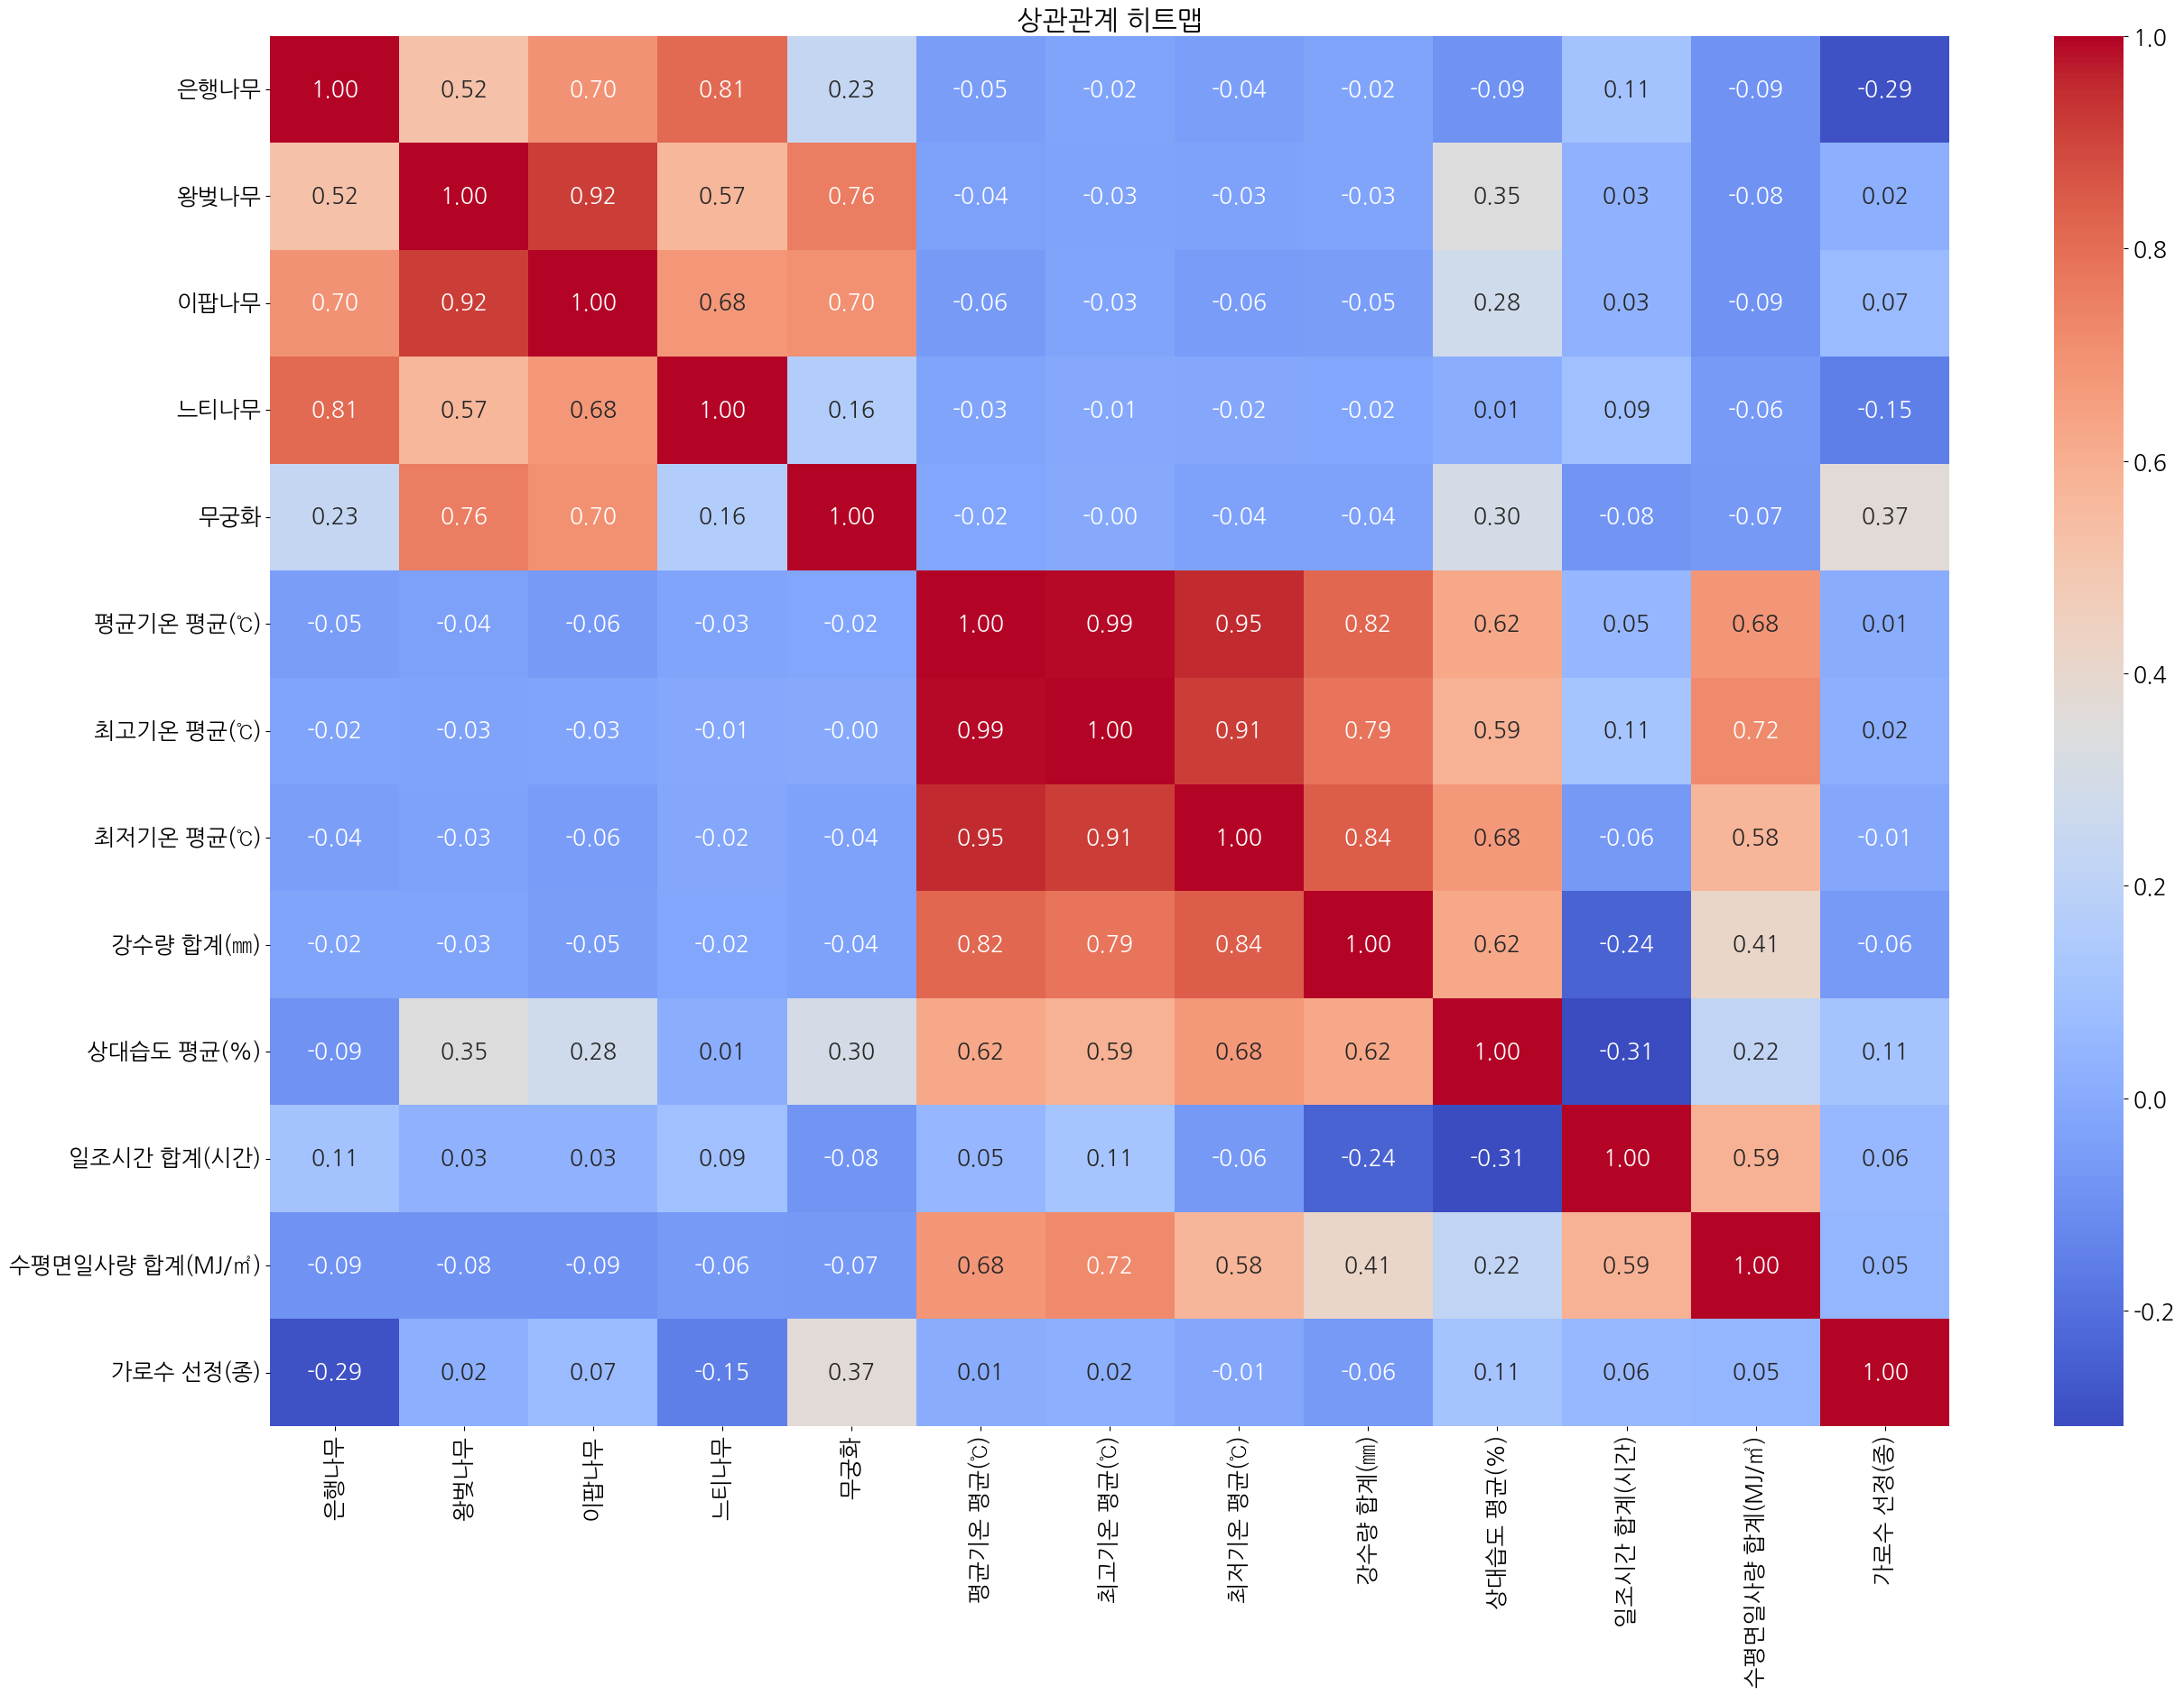

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임에서 상관관계 행렬 계산
correlation_matrix = merged_data_reduced.corr()

# 히트맵 그리기
plt.figure(figsize=(30, 20))  # 그림 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("상관관계 히트맵")
plt.show()

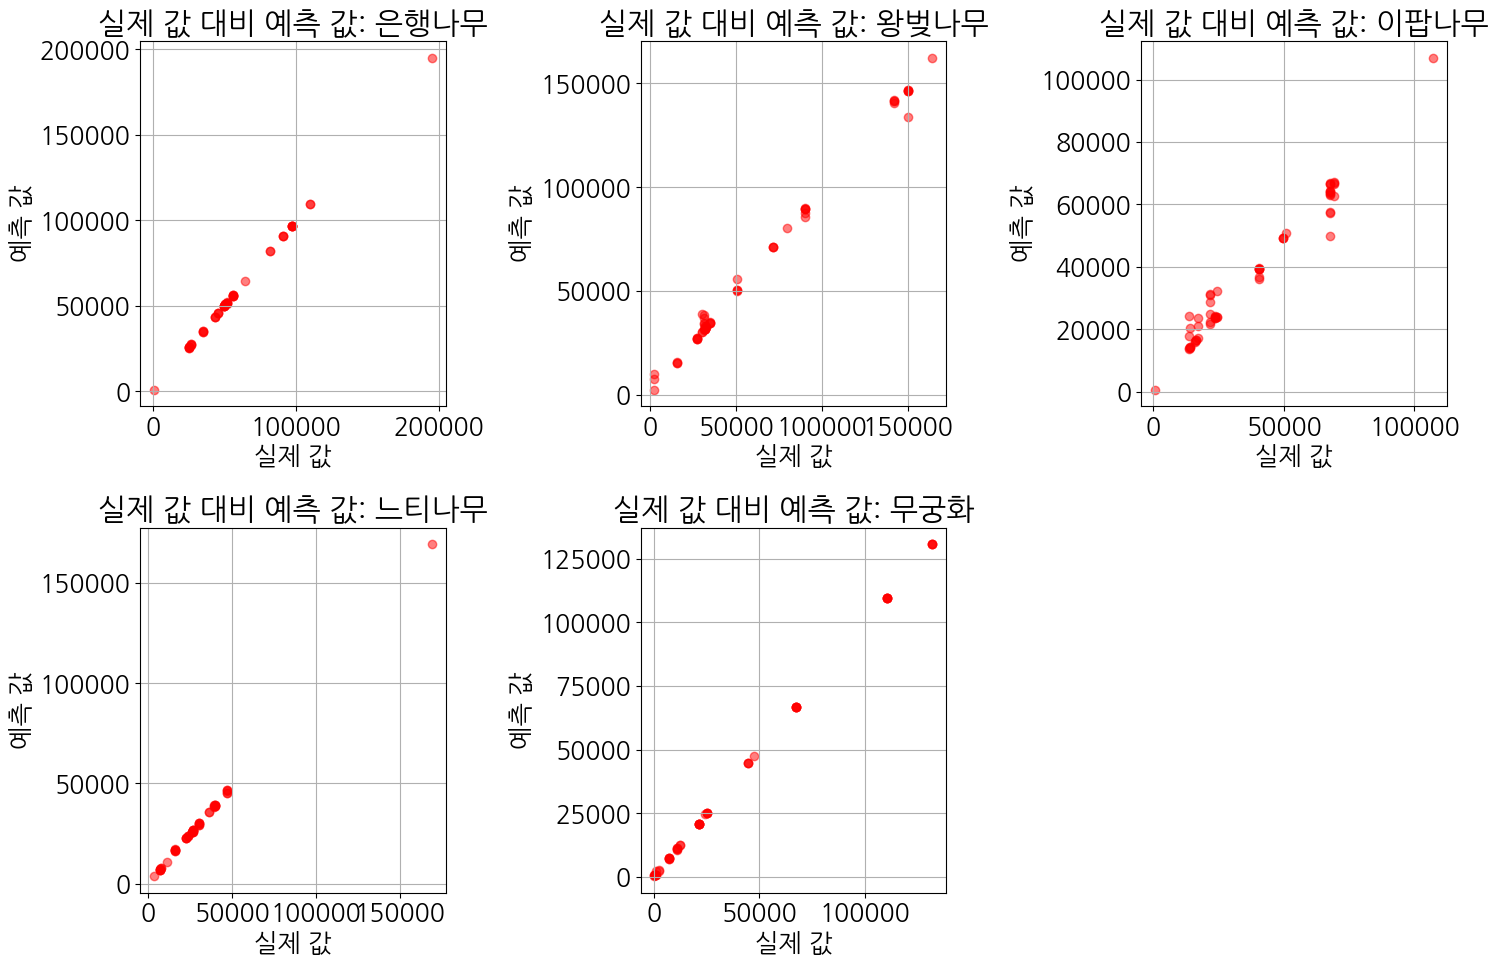

In [113]:
import matplotlib.pyplot as plt

# 서브플롯 설정 (2행, 열의 수는 타겟 변수의 수에 따라 결정)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# 각 타겟 변수에 대한 예측 시각화
for i, target in enumerate(y.columns):
    ax = axes[i//3, i%3]  # 현재 서브플롯 위치 결정
    ax.scatter(y_test[target], y_pred[:, i], alpha=0.5, color='red')  # 붉은색으로 표시
    ax.set_title(f"실제 값 대비 예측 값: {target}")
    ax.set_xlabel("실제 값")
    ax.set_ylabel("예측 값")
    ax.grid(True)

# 빈 서브플롯 숨기기
for i in range(len(y.columns), axes.size):
    fig.delaxes(axes[i//3, i%3])

plt.tight_layout()
plt.show()


In [120]:
import pandas as pd

# 각 타겟 변수별로 실제 값과 예측 값을 DataFrame으로 생성하고 더 넓은 공간으로 출력
for i, target in enumerate(y.columns):
    comparison_df = pd.DataFrame({'실제 값': y_test[target], '예측 값': y_pred[:, i]})
    print(f"{target} - 실제 값 대비 예측 값:")
    print(comparison_df.head().to_string(index=False, formatters={'실제 값':'{:>15.2f}'.format, '예측 값':'{:>15.2f}'.format}))
    print("\n")


은행나무 - 실제 값 대비 예측 값:
           실제 값            예측 값
       45577.00        45684.04
       50109.00        50047.56
       27048.00        27297.67
       50109.00        50071.87
       56281.00        55951.83


왕벚나무 - 실제 값 대비 예측 값:
           실제 값            예측 값
       30288.00        30302.25
      150397.00       146122.96
       34617.00        34587.96
      150397.00       146122.96
       31713.00        31469.38


이팝나무 - 실제 값 대비 예측 값:
           실제 값            예측 값
       24215.00        23924.93
       67650.00        63082.97
       13895.00        14138.87
       67650.00        64094.10
       40451.00        39215.27


느티나무 - 실제 값 대비 예측 값:
           실제 값            예측 값
       39212.00        39212.00
       30164.00        30082.88
       26636.00        26757.64
       30164.00        29209.94
       15924.00        16411.01


무궁화 - 실제 값 대비 예측 값:
           실제 값            예측 값
         700.00          696.36
       67396.00        66727.22
       24942.00        2

In [121]:
import pandas as pd

# 각 타겟 변수별로 실제 값과 예측 값을 DataFrame으로 생성
comparison_df = pd.DataFrame({'실제 값': y_test['이팝나무'], '예측 값': y_pred[:, 2]})  # '이팝나무'에 해당하는 열의 인덱스를 2로 가정
print("이팝나무 - 실제 값 대비 예측 값:")
formatted_string = comparison_df.head().to_string(index=False, formatters={'실제 값':'{:>20.2f}'.format, '예측 값':'{:>20.2f}'.format})
print(formatted_string)

이팝나무 - 실제 값 대비 예측 값:
                실제 값                 예측 값
            24215.00             23924.93
            67650.00             63082.97
            13895.00             14138.87
            67650.00             64094.10
            40451.00             39215.27


In [123]:
print(X_train.columns)

Index(['지역', '평균기온 평균(℃)', '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량 합계(㎜)',
       '상대습도 평균(%)', '일조시간 합계(시간)', '수평면일사량 합계(MJ/㎡)', '계절', '가로수 선정(종)'],
      dtype='object')
